<a href="https://colab.research.google.com/github/Shejaltiwari2356/Iris_Classification/blob/main/IRIS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
iris = load_iris()

# The data (features)
X = iris.data

# The labels (target species)
y = iris.target

# The feature names and target names are stored within the iris object
feature_names = iris.feature_names
target_names = iris.target_names

print("Features (X) shape:", X.shape) # Output: (150, 4)
print("Targets (y) shape:", y.shape) # Output: (150,)

Features (X) shape: (150, 4)
Targets (y) shape: (150,)


In [ ]:
# Combine features and target into a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species_code'] = y # The numerical representation (0, 1, 2)

# Map the numerical code to the actual species name for better readability
df['species_name'] = df['species_code'].apply(lambda x: target_names[x])

print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Descriptive Statistics ---")
print(df.describe())


--- First 5 rows of the dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_code species_name  
0             0       setosa  
1             0       setosa  
2             0       setosa  
3             0       setosa  
4             0       setosa  

--- Descriptive Statistics ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min       


--- Data Information (Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_code       150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

--- Histograms (Feature Distributions) ---


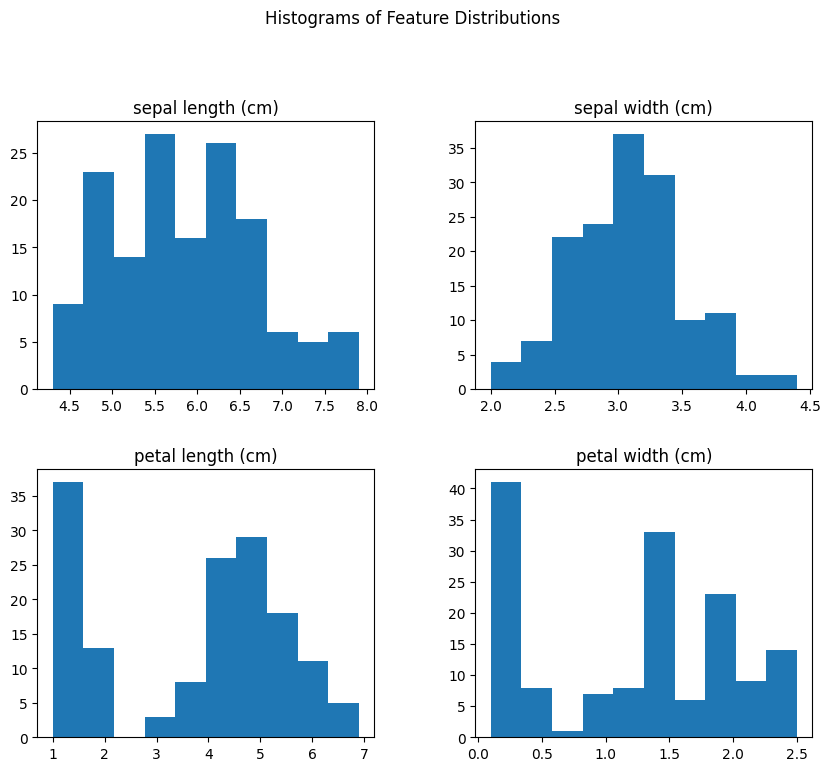


--- Box Plots (Outliers and Spread) ---


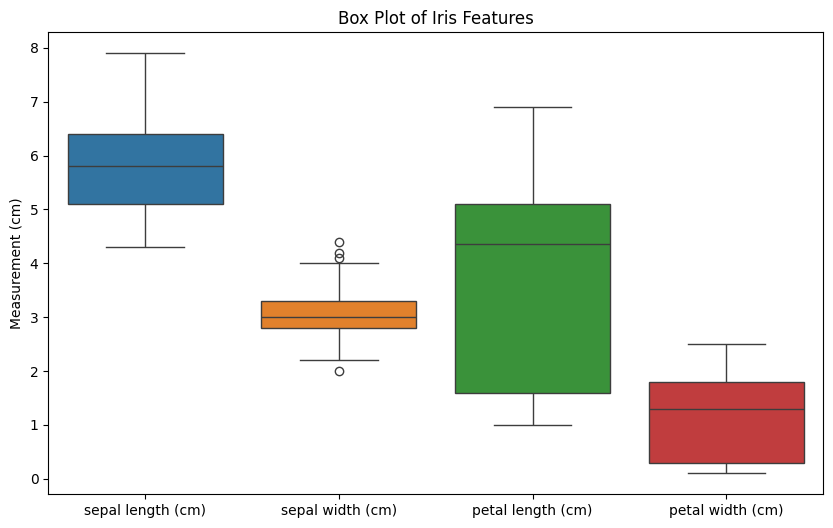


--- Correlation Heatmap ---


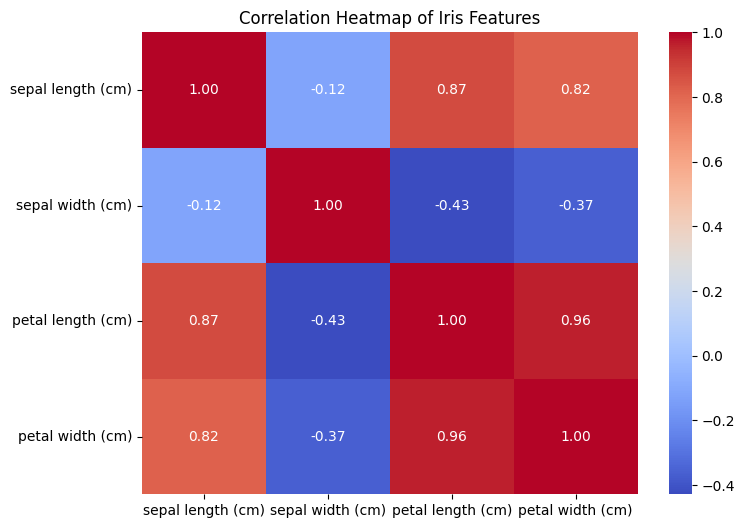

In [ ]:
# Assuming 'df' is your DataFrame with features, 'species_code', and 'species_name'

# 1. Check Data Types and Missing Values
print("\n--- Data Information (Types and Nulls) ---")
df.info()
# (You should see 'Non-Null Count: 150' for all columns, confirming no missing data)

# 2. Histograms (Distribution Analysis)
print("\n--- Histograms (Feature Distributions) ---")
df.drop(columns=['species_code']).hist(figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Feature Distributions', y=1.02)
plt.show()

# 3. Box Plots (Outlier Check and Spread)
print("\n--- Box Plots (Outliers and Spread) ---")
# Drop the code/name columns as they are not measurements
df_features = df.drop(columns=['species_code', 'species_name'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_features)
plt.title('Box Plot of Iris Features')
plt.ylabel('Measurement (cm)')
plt.show()

# 4. Correlation Heatmap (Feature Relationships)
print("\n--- Correlation Heatmap ---")
correlation_matrix = df_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()

<Figure size 1000x1000 with 0 Axes>

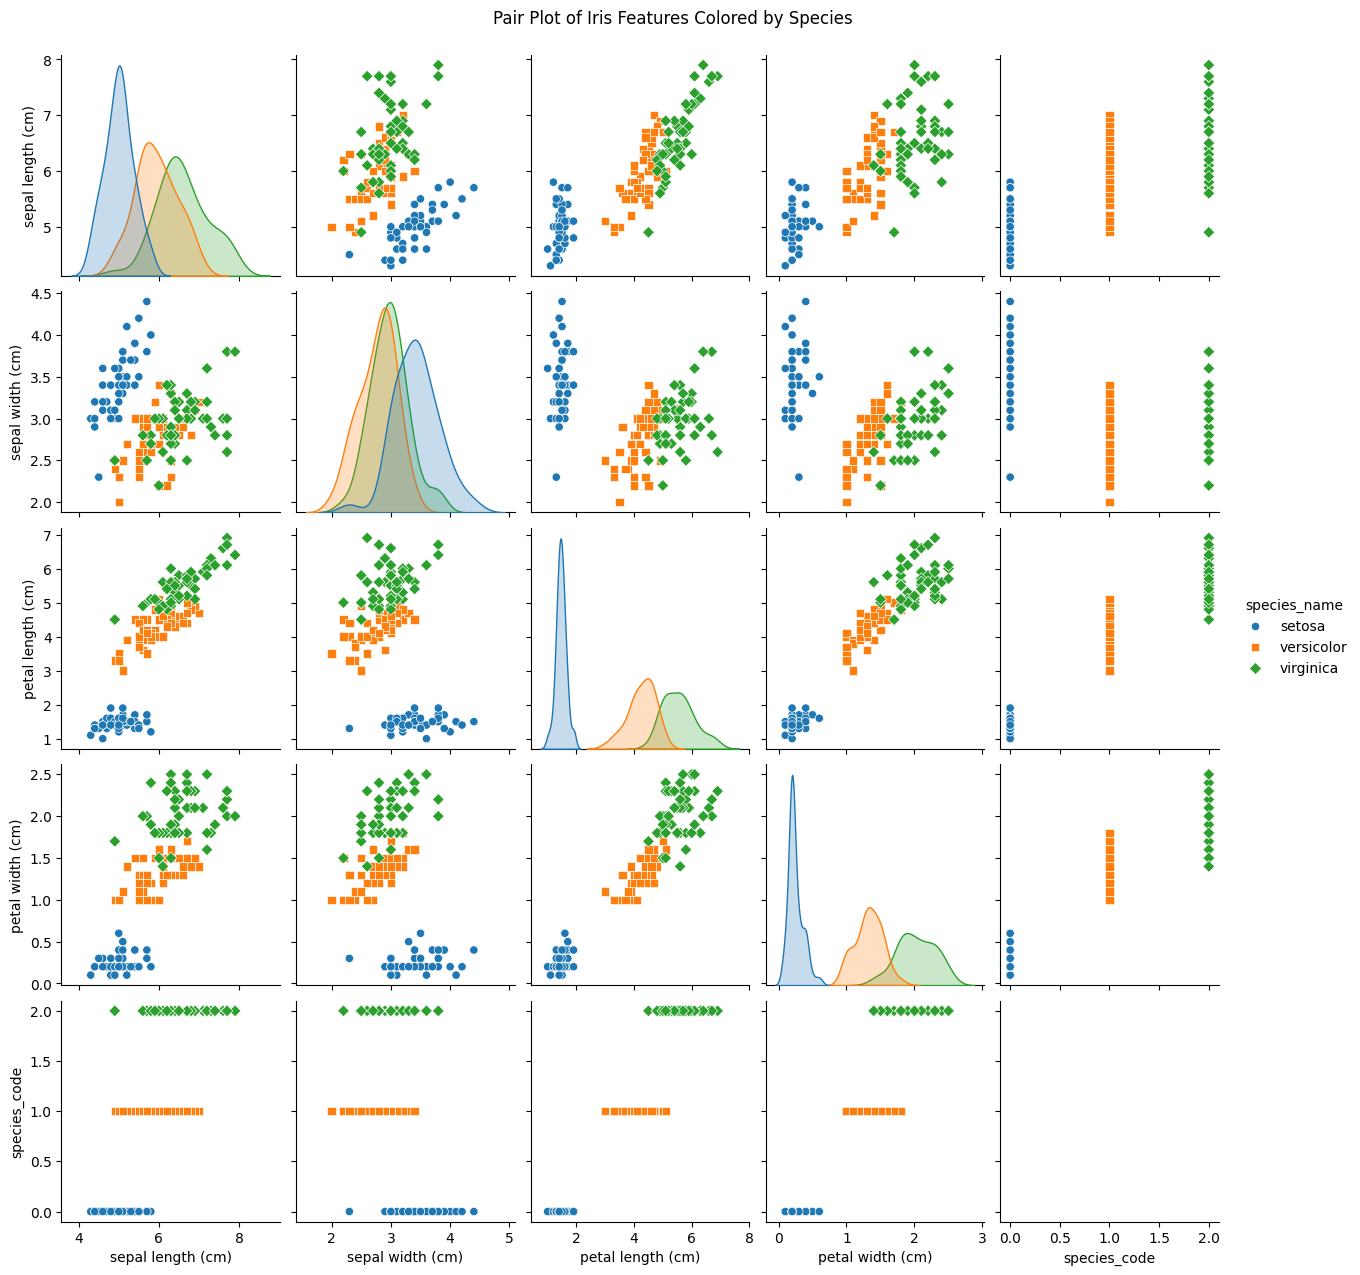

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the features and species name columns are available in your DataFrame 'df'
# df = pd.DataFrame(X, columns=feature_names)
# df['species_name'] = ... # Assuming this column was successfully created

plt.figure(figsize=(10, 10))
# 'hue=' colors the points based on the species, which is the key to seeing separability.
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features Colored by Species', y=1.02)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the StandardScaler object
scaler = StandardScaler()

# ⚠️ IMPORTANT: Fit the scaler ONLY on the training features (X_train)
# The scaler learns the mean and standard deviation from the training data
scaler.fit(X_train)

StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
# This is the required code that defines X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Instantiate the StandardScaler object
scaler = StandardScaler()

# 2. Fit (learn the mean/std) ONLY on the original training features
scaler.fit(X_train)

# 3. Transform both sets to create the scaled variables
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully scaled!")

Data successfully scaled!


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Instantiate the model (k=3)
knn_scaled = KNeighborsClassifier(n_neighbors=3)

# 2. Train the model using the SCALED training data
print("--- Training KNN Model with SCALED Data ---")
knn_scaled.fit(X_train_scaled, y_train)

# 3. Predict on the SCALED test data
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

# 4. Evaluate
accuracy_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)

print(f"\n--- KNN Accuracy Comparison ---")
print(f"1. KNN Accuracy (Original Data): 0.9556")
print(f"2. KNN Accuracy (Scaled Data):   {accuracy_knn_scaled:.4f}")

--- Training KNN Model with SCALED Data ---

--- KNN Accuracy Comparison ---
1. KNN Accuracy (Original Data): 0.9556
2. KNN Accuracy (Scaled Data):   0.9111


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the range of k values to test
k_range = range(1, 21)
accuracies_unscaled = []

# X_train, y_train, X_test, y_test are the UN-SCALED variables

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies_unscaled.append(accuracy_score(y_test, y_pred))

# Find the optimal k and max accuracy for unscaled data
best_k_unscaled = k_range[np.argmax(accuracies_unscaled)]
max_acc_unscaled = np.max(accuracies_unscaled)

print("--- UN-SCALED Data Tuning Results ---")
print(f"Optimal K: {best_k_unscaled}")
print(f"Max Accuracy: {max_acc_unscaled:.4f}")

--- UN-SCALED Data Tuning Results ---
Optimal K: 5
Max Accuracy: 0.9778


In [ ]:
# Assuming X_train_scaled and X_test_scaled have been defined from the previous step

accuracies_scaled = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train) # Training on SCALED data
    y_pred = knn.predict(X_test_scaled) # Predicting on SCALED data
    accuracies_scaled.append(accuracy_score(y_test, y_pred))

# Find the optimal k and max accuracy for scaled data
best_k_scaled = k_range[np.argmax(accuracies_scaled)]
max_acc_scaled = np.max(accuracies_scaled)

print("\n--- SCALED Data Tuning Results ---")
print(f"Optimal K: {best_k_scaled}")
print(f"Max Accuracy: {max_acc_scaled:.4f}")


--- SCALED Data Tuning Results ---
Optimal K: 9
Max Accuracy: 0.9556


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # We'll use this one last time

# 1. Re-train the optimal model (k=5, unscaled data)
# Note: We must use the original, UN-SCALED training data (X_train, y_train)
optimal_knn = KNeighborsClassifier(n_neighbors=5)
optimal_knn.fit(X_train, y_train)

# 2. Generate predictions on the unscaled test data
y_pred_optimal = optimal_knn.predict(X_test)

# Check the final accuracy one last time
final_accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"--- Final Accuracy (Unscaled KNN, k=5): {final_accuracy:.4f} ---")

# 3. Get the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
# Assuming target_names is defined as ['setosa', 'versicolor', 'virginica']
target_names = ['setosa', 'versicolor', 'virginica']
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

print("\n--- Confusion Matrix ---")
print(cm_df)

# 4. Get the Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_optimal, target_names=target_names))

--- Final Accuracy (Unscaled KNN, k=5): 0.9778 ---

--- Confusion Matrix ---
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          15          0
virginica        0           1         14

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

k_range = range(1, 21)
accuracies_manhattan = []

print("--- 1. Manhattan Distance Tuning ---")

for k in k_range:
    # Set the metric to 'manhattan' (p=1)
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred = knn_manhattan.predict(X_test)
    accuracies_manhattan.append(accuracy_score(y_test, y_pred))

# Find the optimal k and max accuracy
best_k_manhattan = k_range[np.argmax(accuracies_manhattan)]
max_acc_manhattan = np.max(accuracies_manhattan)

print(f"Optimal K (Manhattan): {best_k_manhattan}")
print(f"Max Accuracy (Manhattan): {max_acc_manhattan:.4f}")

--- 1. Manhattan Distance Tuning ---
Optimal K (Manhattan): 11
Max Accuracy (Manhattan): 0.9556


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# --- ASSUMING THE ORIGINAL DATA IS LOADED INTO X (numpy array) ---
# You need the feature names from your initial setup:
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# 1. Convert the NumPy array X into a Pandas DataFrame
X_df = pd.DataFrame(X, columns=feature_names) # X should be your original feature array

# 2. Select the 3 best features by dropping the noisy 'sepal width (cm)'
X_3_features = X_df.drop('sepal width (cm)', axis=1) # axis=1 is for columns

# 3. Re-split the data using the new 3-feature set
X_train_3, X_test_3, y_train, y_test = train_test_split(
    X_3_features, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Train and evaluate the 3-feature model
knn_3 = KNeighborsClassifier(n_neighbors=5) # Optimal k=5
knn_3.fit(X_train_3, y_train)
y_pred_3 = knn_3.predict(X_test_3)

# 5. Check accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"\n--- 3-Feature KNN Accuracy (k=5) ---")
print(f"Previous 4-Feature Accuracy: 0.9778")
print(f"New 3-Feature Accuracy:      {accuracy_3:.4f}")


--- 3-Feature KNN Accuracy (k=5) ---
Previous 4-Feature Accuracy: 0.9778
New 3-Feature Accuracy:      0.9778
